In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



Nous utilisérons dataset load_breast_cancer

- Importer le dateset

- Définir les ensembles d'apprentissage (%75) et test (%25) en mettant random_state=44. 

- Chaque donnée a combien d'attributs?

- Il y a combien de données dans l'ensemble d'apprentissage  (test)


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

num_attributes = X.shape[1]
print(f"Chaque donnée a {num_attributes} attributs.")

num_train_data = X_train.shape[0]
num_test_data = X_test.shape[0]
print(f"Il y a {num_train_data} données dans l'ensemble d'apprentissage.")
print(f"Il y a {num_test_data} données dans l'ensemble de test.")

Chaque donnée a 30 attributs.
Il y a 426 données dans l'ensemble d'apprentissage.
Il y a 143 données dans l'ensemble de test.


Nous utilisérons une autre méthode  d'apprentissage  supervisé (SVM)

from sklearn.svm import SVC

https://scikit-learn.org/stable/modules/svm.html

Vous suivrez la même procédure d'apprentissage vu en cours et en TP.

- Faites l'apprentissage. Quel est le "score" (accuracy_score) pour l'ensemble de test

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(random_state=44)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Le score (accuracy) pour l'ensemble de test est : {accuracy:.4f}")


Le score (accuracy) pour l'ensemble de test est : 0.9580


Faites le prétraitement des données par StandardScaler

from sklearn.preprocessing import StandardScaler

- Mettez les données prétraitées sur les variables X_train_s, X_test_s

- Affichez la valeur moyenne  et déviation standard des données prétraitées ( Numpy, mean, std)

- Faites l'apprentissage sur les données prétraitées. Quel est le score sur les données de test?


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

mean_value = np.mean(X_train_s, axis=0)
std_deviation = np.std(X_train_s, axis=0)

print("Valeur moyenne des données prétraitées :\n", mean_value)
print("\nDéviation standard des données prétraitées :\n", std_deviation)


svm_classifier.fit(X_train_s, y_train)
y_pred_s = svm_classifier.predict(X_test_s)

accuracy_s = accuracy_score(y_test, y_pred_s)
print(f"\nLe score (accuracy) sur les données de test après prétraitement est : {accuracy_s:.4f}")

Valeur moyenne des données prétraitées :
 [-2.41903524e-15 -1.02382891e-15 -1.18006804e-15 -5.00121593e-16
 -9.33134634e-15 -2.08570772e-15  6.86461842e-16  1.25981646e-15
 -4.03198601e-15  1.31142489e-14  1.99201636e-15  3.02053635e-16
  1.36627798e-15 -5.96288798e-16  1.87755719e-15 -5.64233063e-16
 -9.48641270e-17  2.64003738e-16  2.35596623e-16  6.42678399e-16
  1.29473896e-15  4.45261981e-15 -1.75733189e-15 -7.68295182e-16
  6.72773001e-15  4.34967659e-16 -4.17506405e-16  1.33747994e-15
 -2.15744220e-15 -4.05778697e-16]

Déviation standard des données prétraitées :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

Le score (accuracy) sur les données de test après prétraitement est : 0.9860


**Reduction de dimension**

Pour visualiser et pour accélerer ML

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- Dimuniez le nombre d'attributs à 2 
(Vous utilisez les données normalisées)

from sklearn.decomposition import PCA # Principal Component Analysis

- Dessinez ce dataset axe x: Feature 0, axe y: Feature 1, les points en couleurs en fonction de y (0-1)


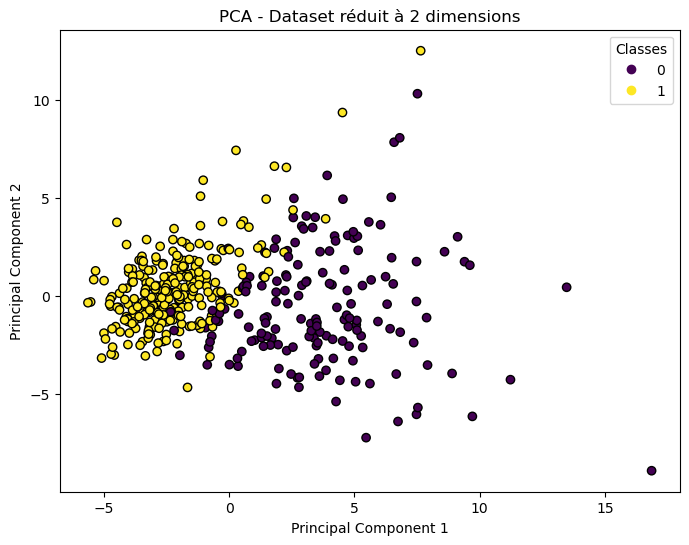

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_s)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title('PCA - Dataset réduit à 2 dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()


 Faites l'apprentissage avec les données réduite. Quelle est la complexité sur l'ensemble de test?

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier_pca = SVC(random_state=44)

X_test_pca = pca.transform(X_test_s)

svm_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_classifier_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Le score (accuracy) sur l'ensemble de test réduit est : {accuracy_pca:.4f}")


ValueError: X has 2 features, but SVC is expecting 10 features as input.

Quel est le paramètre explained_variance_ratio_ de votre modèle?

In [17]:

explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio des composantes principales:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Composante principale {i + 1}: {ratio:.4f}")


Explained Variance Ratio des composantes principales:
Composante principale 1: 0.5310
Composante principale 2: 0.1728


Dessinez une figure axe x: nombre de composantes[1-10], axe y:explained_variance_ratio_.sum()  du modèle



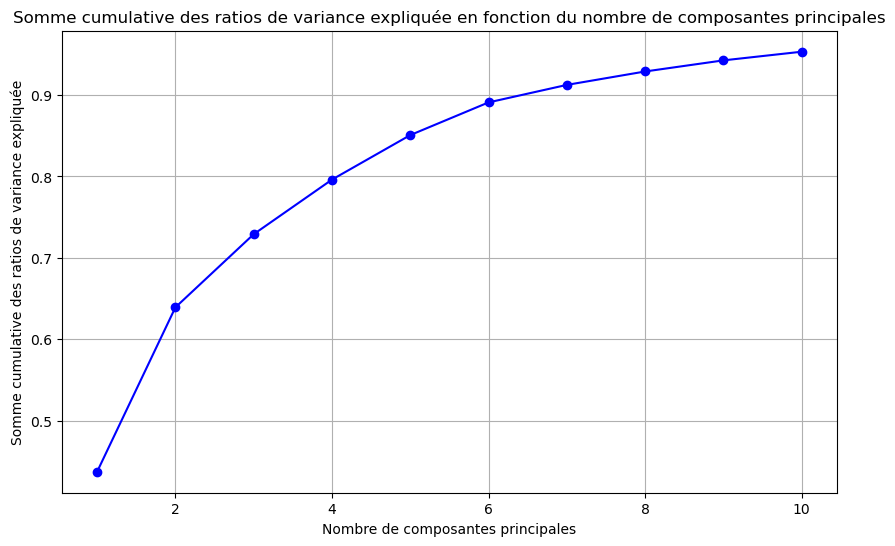

In [9]:
n_components_range = np.arange(1, 11)

cumulative_explained_variance = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    
    pca.fit(X_train_s)
    
    cumulative_explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Somme cumulative des ratios de variance expliquée en fonction du nombre de composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Somme cumulative des ratios de variance expliquée')
plt.grid(True)
plt.show()


Dessinez une figure axe x: nombre de composantes[1-10],
    axe y:  score du modèle de l'ensemble de test
        

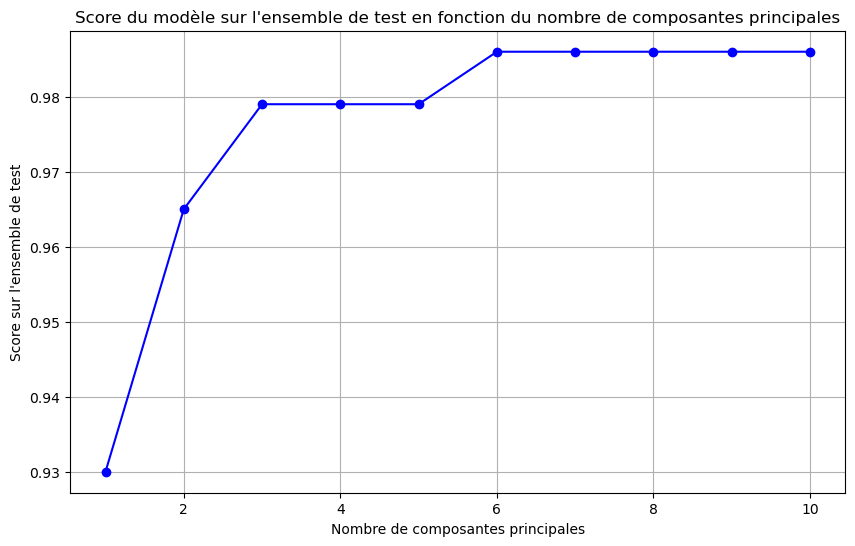

In [10]:

n_components_range = np.arange(1, 11)

test_scores = []

svm_classifier = SVC(random_state=44)

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    
    X_train_pca = pca.fit_transform(X_train_s)
    X_test_pca = pca.transform(X_test_s)
    
    svm_classifier.fit(X_train_pca, y_train)
    
    y_pred_pca = svm_classifier.predict(X_test_pca)
    
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    test_scores.append(accuracy_pca)

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, test_scores, marker='o', linestyle='-', color='b')
plt.title('Score du modèle sur l\'ensemble de test en fonction du nombre de composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Score sur l\'ensemble de test')
plt.grid(True)
plt.show()


Considérez toutes les données.

Faites le prétraitement avec MinMaxScaler 

Faites la réduction d'attributs avec PCA=2

Nous ferons  l'apprentissage non supervisé avec Kmeans avec le nombre de clusters =2.

Regardez  le notebook apprentissage non supervisé du CM.

Dessinez les données et les résultats du clustering sur la même figure







c:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


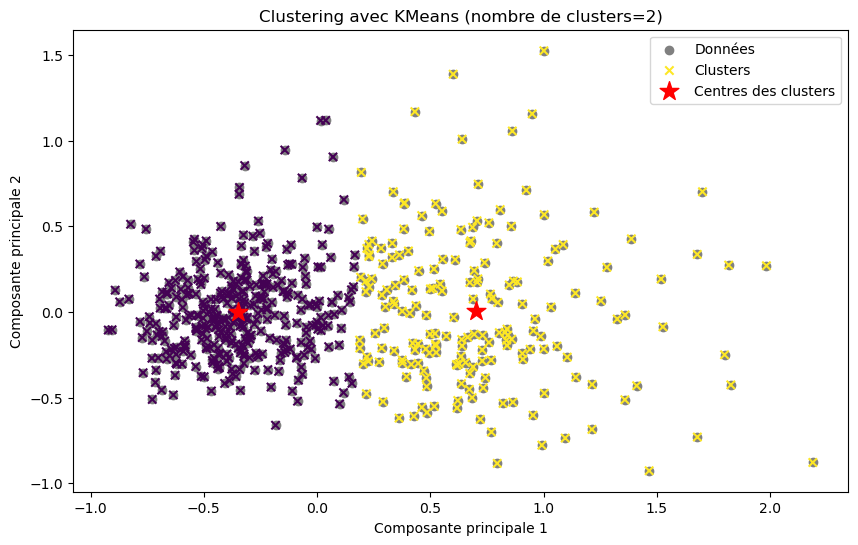

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


X_all = data.data


scaler = MinMaxScaler()
X_all_scaled = scaler.fit_transform(X_all)


pca = PCA(n_components=2)
X_all_pca = pca.fit_transform(X_all_scaled)


kmeans = KMeans(n_clusters=2, random_state=44)
kmeans.fit(X_all_pca)


clusters = kmeans.predict(X_all_pca)


plt.figure(figsize=(10, 6))


plt.scatter(X_all_pca[:, 0], X_all_pca[:, 1], c='gray', marker='o', label='Données')


plt.scatter(X_all_pca[:, 0], X_all_pca[:, 1], c=clusters, marker='x', cmap='viridis', label='Clusters')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', s=200, label='Centres des clusters')

plt.title('Clustering avec KMeans (nombre de clusters=2)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.show()


Nous  souhaitons calculer la distorsion  du clustering avec le nombre de clusters=2.

- Quelle est la distorsion lorsque PCA=2, clusters=2


In [15]:

pca = PCA(n_components=2)
X_all_pca = pca.fit_transform(X_all_scaled)


kmeans = KMeans(n_clusters=2, random_state=44)
kmeans.fit(X_all_pca)

distorsion = kmeans.inertia_

print(f"La distorsion avec PCA=2 et nombre de clusters=2 est : {distorsion:.4f}")


c:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


La distorsion avec PCA=2 et nombre de clusters=2 est : 110.9715


Serait-il possible de préciser seulement le score sans préciser le nombre de  composantes? Vous pouvez chercher dans la documentation du logiciel. Quel est le nombre de composantes si on souhaite avoir le score 0.99 sur les données de test?